In [ ]:
#Adi Gumelar_CV A_Batch 6

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 52.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ultralytics
import cv2
import random
import os
from PIL import Image
from ultralytics import YOLO
from IPython.display import display
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
#setup variables
num_samples = 16
src_yamlfile='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml'
src_image_train='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/images/*'
src_image_test='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/test/images'
src_image_valid='/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images'

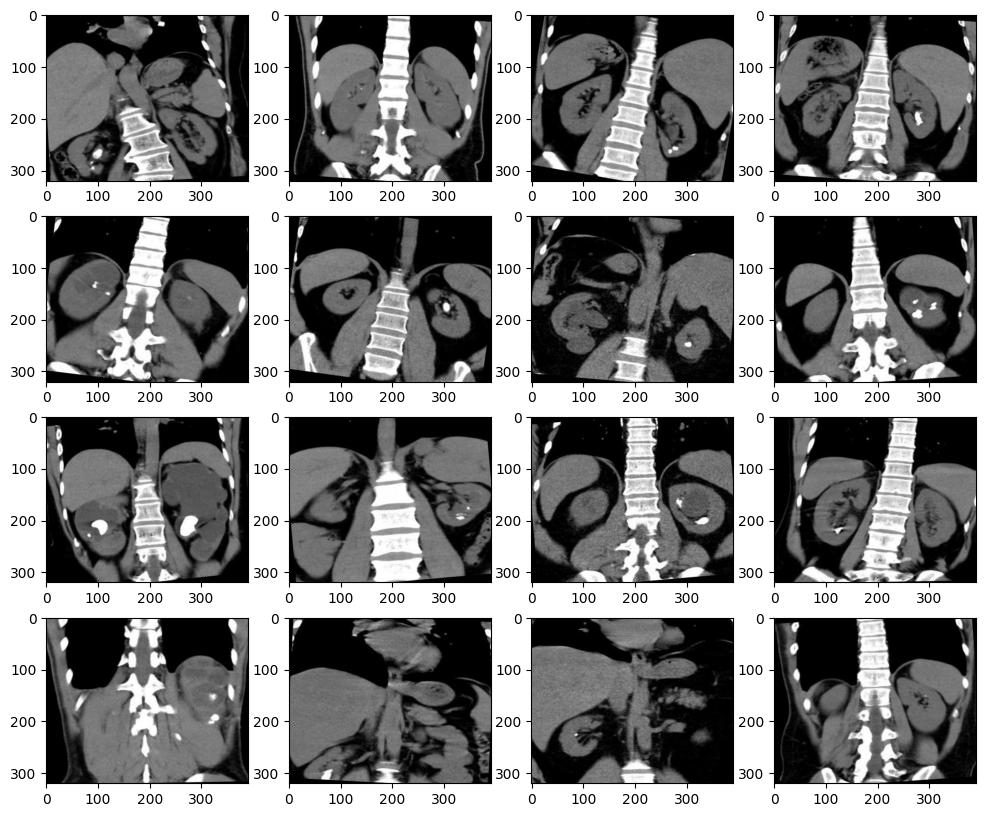

In [5]:
images_train = glob(src_image_train)
random_image = random.sample(images_train, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('on')

In [6]:
# Choosing Yolov8
yolo_v8 = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 41.2MB/s]


In [7]:
num_epochs=50
batch_size=10
num_seed = 6
learning_rate = 0.001
optimizer = 'Adam'
num_worker = 2

model_yolov8 = yolo_v8.train(data=src_yamlfile, seed=num_seed, epochs=num_epochs, lr0=learning_rate, workers=num_worker, optimizer=optimizer, verbose=True, project='KidneyStone_yolov8s',name='yolo_v8')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=KidneyStone_yolov8s, name=yolo_v8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 341MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to KidneyStone_yolov8s/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to KidneyStone_yolov8s/yolo_v8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.05G       2.28       2.34      1.357         40        640: 100%|██████████| 66/66 [00:28<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.46s/it]

                   all        123        325      0.727      0.366      0.541      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.89G      2.123      1.146      1.294         47        640: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        123        325      0.486      0.446      0.382      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.02G      2.114      1.195      1.289         41        640: 100%|██████████| 66/66 [00:27<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325      0.677      0.569      0.563      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.05G      2.102      1.168      1.303         48        640: 100%|██████████| 66/66 [00:26<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        123        325      0.622      0.603      0.562      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.06G      2.062      1.158      1.269         48        640: 100%|██████████| 66/66 [00:25<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        123        325      0.699      0.643      0.656       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.06G      2.077      1.067      1.291         38        640: 100%|██████████| 66/66 [00:27<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        123        325      0.776       0.64      0.625      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.04G      2.016       1.08      1.246         51        640: 100%|██████████| 66/66 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        123        325      0.724      0.649       0.67      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.07G      2.037      1.057      1.274         71        640: 100%|██████████| 66/66 [00:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        123        325      0.733      0.578      0.644      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.04G      2.032      1.026      1.245         41        640: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        123        325       0.74      0.646      0.677      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.08G          2      1.025      1.242         40        640: 100%|██████████| 66/66 [00:27<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        325      0.764      0.678        0.7      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.04G       1.99      1.018      1.234         44        640: 100%|██████████| 66/66 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        123        325      0.721      0.622      0.608      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.06G      1.968      1.009      1.223         49        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        123        325      0.741      0.616       0.62      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.04G      1.949     0.9877       1.22         37        640: 100%|██████████| 66/66 [00:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        123        325      0.722      0.646      0.632      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.06G      1.985      1.014      1.209         58        640: 100%|██████████| 66/66 [00:25<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        325      0.771      0.695      0.718      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.05G      1.951      1.012      1.236         27        640: 100%|██████████| 66/66 [00:27<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        325      0.766       0.64      0.671      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.06G      1.963     0.9775      1.226         40        640: 100%|██████████| 66/66 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        123        325      0.753      0.676      0.708      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.03G      1.955     0.9715      1.224         51        640: 100%|██████████| 66/66 [00:28<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        123        325      0.766      0.654      0.671      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.1G      1.914     0.9235      1.185         46        640: 100%|██████████| 66/66 [00:24<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        123        325      0.758      0.676      0.708      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.03G      1.928     0.9458      1.186         36        640: 100%|██████████| 66/66 [00:28<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        123        325       0.76      0.698      0.712      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.06G      1.874     0.9245      1.182         41        640: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        123        325      0.793      0.661      0.715      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.06G      1.823       0.89      1.157         48        640: 100%|██████████| 66/66 [00:27<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.776      0.714      0.722      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.85G      1.849     0.8865      1.163         36        640: 100%|██████████| 66/66 [00:25<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325      0.813      0.652      0.708       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.03G      1.874     0.9136      1.154         44        640: 100%|██████████| 66/66 [00:25<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        123        325      0.773      0.683      0.705      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.06G      1.813     0.8763      1.166         65        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        123        325      0.813      0.709      0.731      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.04G      1.833     0.8854      1.141         44        640: 100%|██████████| 66/66 [00:25<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        325      0.775      0.698      0.701      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.09G      1.848     0.9026      1.153         54        640: 100%|██████████| 66/66 [00:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        123        325      0.793      0.649       0.71      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.06G      1.827     0.8983      1.126         55        640: 100%|██████████| 66/66 [00:24<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        325      0.791      0.687      0.751      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.05G      1.791     0.8461      1.112         21        640: 100%|██████████| 66/66 [00:27<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        123        325      0.774      0.644      0.669      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G      1.796     0.8497      1.133         34        640: 100%|██████████| 66/66 [00:24<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325      0.805       0.72      0.745      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.89G      1.755     0.8285       1.13         33        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        123        325      0.731      0.711      0.749      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.04G      1.791     0.8269      1.117         55        640: 100%|██████████| 66/66 [00:25<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        123        325      0.802      0.686      0.731      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.9G      1.741     0.8109      1.093         41        640: 100%|██████████| 66/66 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        123        325      0.781      0.698      0.729      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.05G      1.702     0.7988       1.11         58        640: 100%|██████████| 66/66 [00:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        123        325      0.764      0.708      0.717      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.88G        1.7     0.7803      1.094         30        640: 100%|██████████| 66/66 [00:24<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        123        325      0.775      0.689      0.735      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.04G      1.697     0.7843      1.098         42        640: 100%|██████████| 66/66 [00:31<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        123        325      0.764      0.683       0.73      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.07G      1.714     0.7882      1.088         44        640: 100%|██████████| 66/66 [00:25<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        123        325      0.775      0.705      0.739      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.05G      1.662     0.7734      1.088         67        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        123        325      0.799      0.735      0.756        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.06G      1.679     0.7717      1.084         53        640: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        123        325      0.776      0.714      0.753      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.87G      1.665     0.7553      1.067         69        640: 100%|██████████| 66/66 [00:25<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        123        325      0.795      0.692      0.725       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.9G      1.685     0.7733      1.086         62        640: 100%|██████████| 66/66 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        123        325      0.798      0.669      0.704      0.255


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.04G      1.641     0.7454      1.096         18        640: 100%|██████████| 66/66 [00:26<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        123        325      0.815      0.692      0.721      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.88G      1.607     0.7274      1.087         28        640: 100%|██████████| 66/66 [00:26<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        123        325      0.836      0.705      0.743      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.02G      1.607     0.7329      1.086         31        640: 100%|██████████| 66/66 [00:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        325      0.848      0.668      0.737       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.04G      1.587      0.718      1.094         27        640: 100%|██████████| 66/66 [00:31<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        123        325      0.821      0.692      0.724      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.86G       1.58     0.7126      1.073         26        640: 100%|██████████| 66/66 [00:24<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        123        325      0.811      0.683      0.723      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.04G      1.541     0.6873      1.064         30        640: 100%|██████████| 66/66 [00:24<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        123        325      0.807      0.692      0.728      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.05G      1.538     0.6831      1.069         32        640: 100%|██████████| 66/66 [00:24<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.832      0.705      0.751        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.04G      1.519     0.6806      1.045         23        640: 100%|██████████| 66/66 [00:24<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        123        325      0.802      0.698      0.733      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.88G      1.506     0.6774      1.032         29        640: 100%|██████████| 66/66 [00:25<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        123        325      0.803      0.705      0.728      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.06G      1.499     0.6638      1.047         24        640: 100%|██████████| 66/66 [00:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        123        325       0.82      0.714      0.748      0.296



50 epochs completed in 0.414 hours.
Optimizer stripped from KidneyStone_yolov8s/yolo_v8/weights/last.pt, 22.5MB
Optimizer stripped from KidneyStone_yolov8s/yolo_v8/weights/best.pt, 22.5MB

Validating KidneyStone_yolov8s/yolo_v8/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


                   all        123        325       0.73      0.714      0.748      0.309
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to KidneyStone_yolov8s/yolo_v8


In [8]:
def kidneystone_detection(img_path, model):
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

def show_single_image(img_file, model_trained):
    # Load the current image and run object detection
    detect_img = kidneystone_detection(img_file, model_trained)

    # Create a figure and axis for a single image
    fig, ax = plt.subplots(figsize=(5,5))

    # Plot the current image
    ax.imshow(detect_img)
    ax.axis('off')

    plt.show()

def show_train_and_validation_graphs(result):
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()

In [9]:
df_testing = os.listdir(src_image_test)

In [10]:
selected_images = random.sample(df_testing, 16)

In [11]:
model_yolov8_trained = YOLO('/content/KidneyStone_yolov8s/yolo_v8/weights/best.pt')


0: 544x640 1 Tas_Var, 42.6ms
Speed: 2.1ms preprocess, 42.6ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 23.9ms
Speed: 3.3ms preprocess, 23.9ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 15.6ms
Speed: 2.3ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 16.4ms
Speed: 3.4ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 15.8ms
Speed: 3.2ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shap

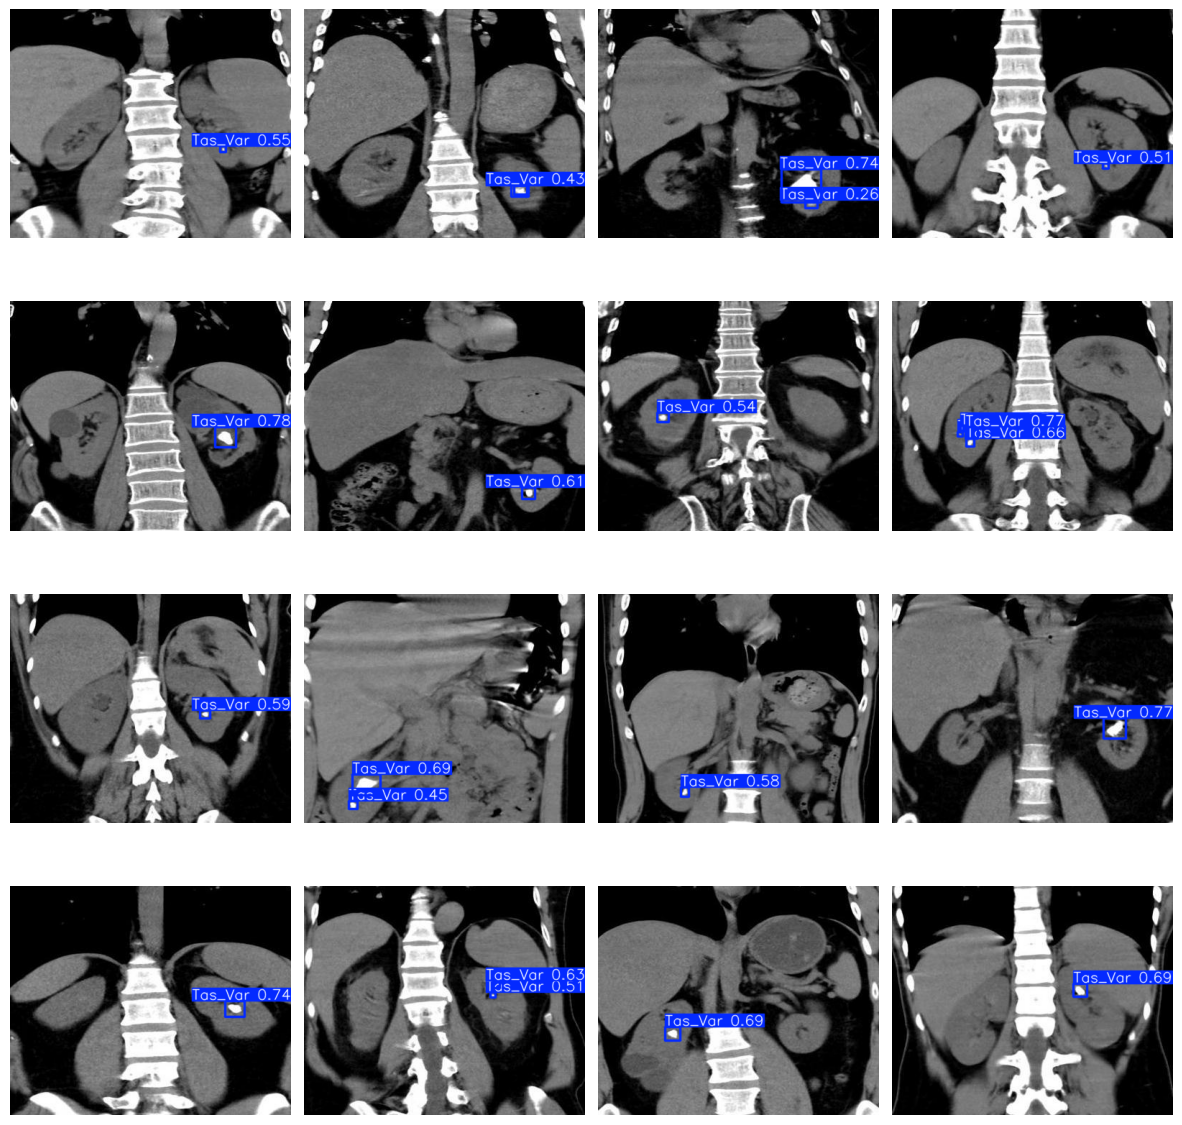

In [12]:
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(src_image_test, img_file)
    detect_img = kidneystone_detection(img_path, model_yolov8_trained)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [13]:
results = pd.read_csv('/content/KidneyStone_yolov8s/yolo_v8/results.csv') # need define directory
results #results.columns

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,50.9667,2.28010,2.34018,1.35680,0.72696,0.36615,0.54132,0.20123,2.11215,2.06354,1.23817,0.067500,0.000328,0.000328
1,2,78.9102,2.12342,1.14597,1.29440,0.48561,0.44615,0.38234,0.13598,2.15752,1.46734,1.26719,0.034487,0.000649,0.000649
2,3,110.1030,2.11433,1.19493,1.28914,0.67651,0.56923,0.56336,0.19493,2.12017,1.13550,1.25804,0.001461,0.000956,0.000956
3,4,140.0510,2.10220,1.16813,1.30264,0.62180,0.60308,0.56239,0.20603,2.07127,1.76776,1.21554,0.000941,0.000941,0.000941
4,5,168.4580,2.06190,1.15792,1.26917,0.69949,0.64308,0.65579,0.25995,1.97276,1.10291,1.20282,0.000921,0.000921,0.000921
5,6,198.6120,2.07723,1.06739,1.29054,0.77601,0.63959,0.62525,0.25776,1.97073,0.98448,1.20635,0.000901,0.000901,0.000901
6,7,226.1700,2.01648,1.08020,1.24605,0.72362,0.64923,0.66969,0.25942,2.02346,1.13546,1.17620,0.000881,0.000881,0.000881
7,8,259.8560,2.03678,1.05659,1.27380,0.73265,0.57846,0.64384,0.25691,2.05801,0.99843,1.19838,0.000861,0.000861,0.000861
8,9,287.3950,2.03189,1.02608,1.24497,0.73968,0.64615,0.67687,0.23228,2.12739,1.04051,1.22453,0.000842,0.000842,0.000842
9,10,317.9550,2.00014,1.02536,1.24235,0.76411,0.67774,0.70042,0.28400,2.02031,0.97740,1.20708,0.000822,0.000822,0.000822


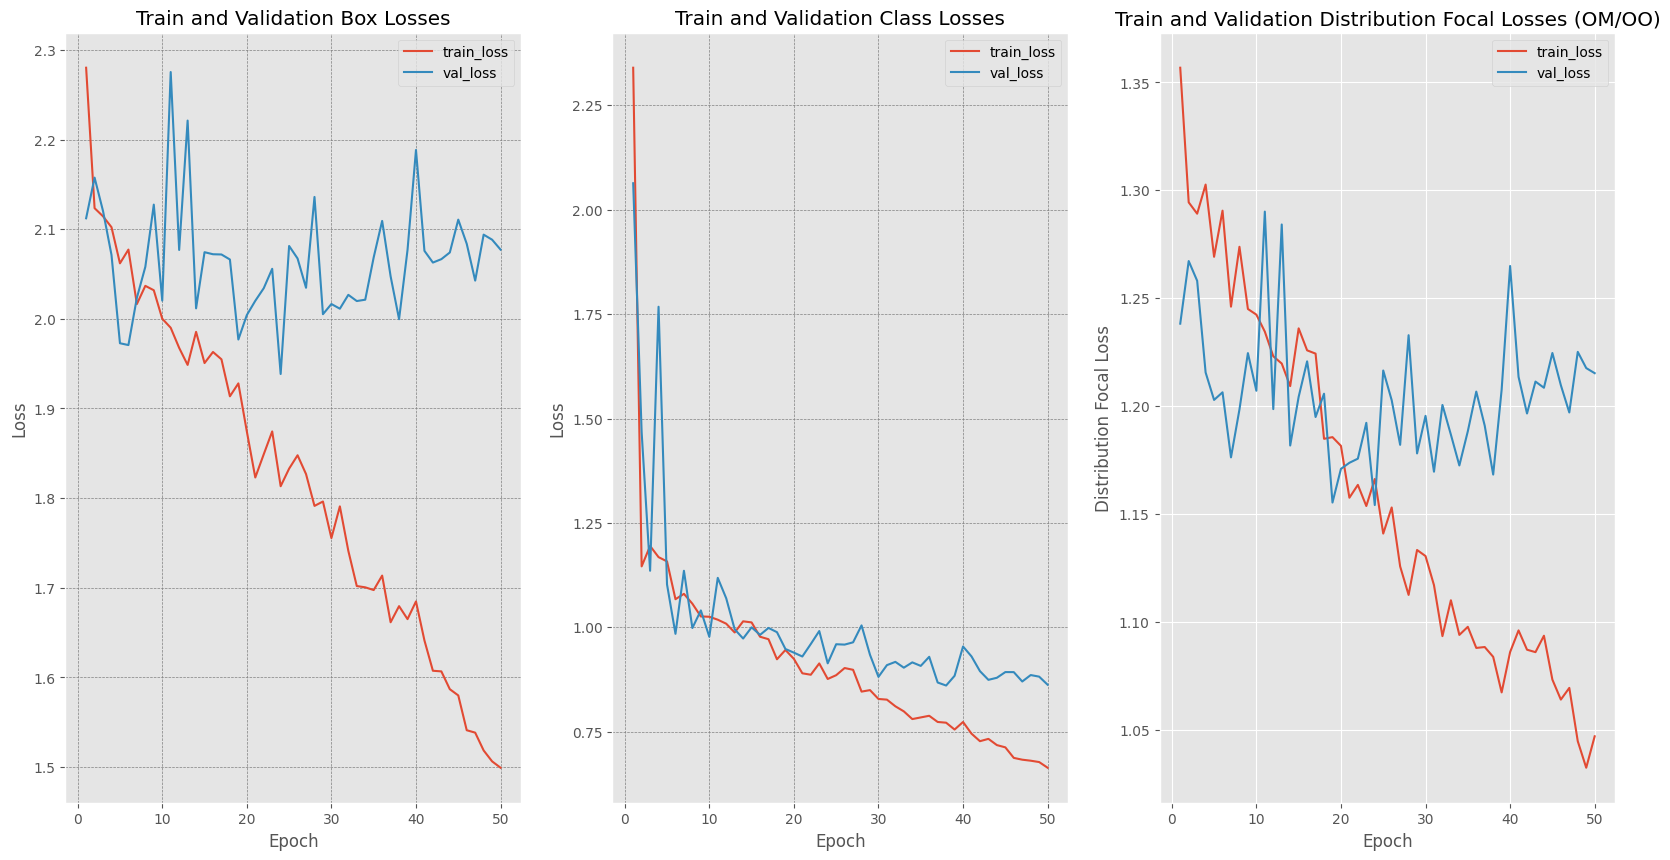

In [14]:
show_train_and_validation_graphs(results)

(-0.5, 2399.5, 1199.5, -0.5)

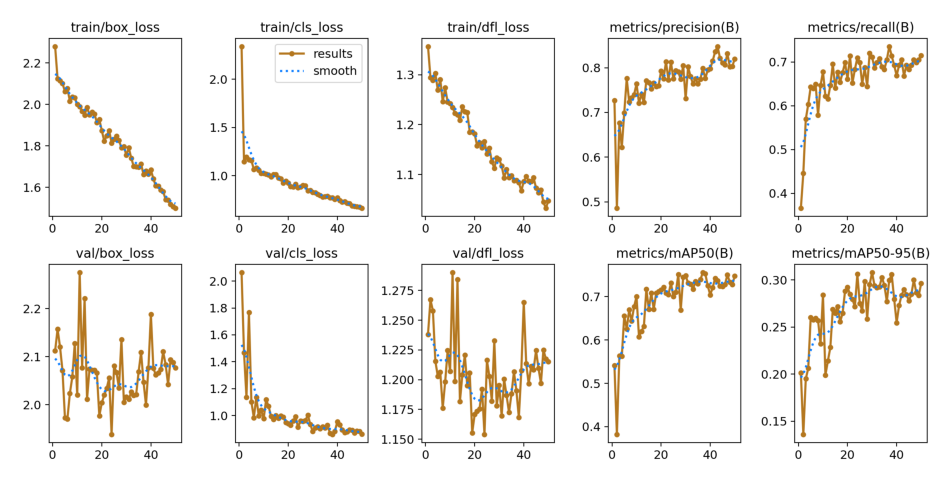

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8s/yolo_v8/results.png'))
plt.axis('off')

(-0.5, 2249.5, 1499.5, -0.5)

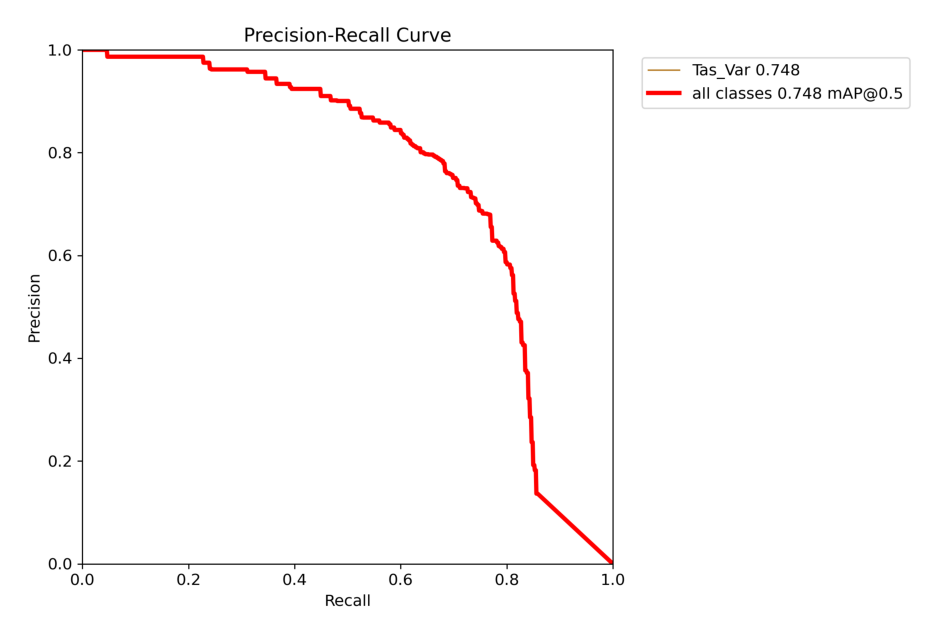

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/content/KidneyStone_yolov8s/yolo_v8/PR_curve.png')) #need define directory
plt.axis('off')

In [17]:
# this need to be act as parameter input when run on deploy mode
single_image = src_image_valid + '/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg' #need check directory

In [18]:
y = model_yolov8_trained.predict(single_image)

print(type(y))


image 1/1 /content/drive/MyDrive/Colab Notebooks/CVFinalProject/KidneyStoneDataset/valid/images/1-3-46-670589-33-1-63737661477473189500001-5463064330587912766_png_jpg.rf.72d5fd49b7ea305b3167bb1d7ac8dbc7.jpg: 544x640 1 Tas_Var, 16.9ms
Speed: 3.3ms preprocess, 16.9ms inference, 5.3ms postprocess per image at shape (1, 3, 544, 640)
<class 'list'>



0: 544x640 1 Tas_Var, 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)


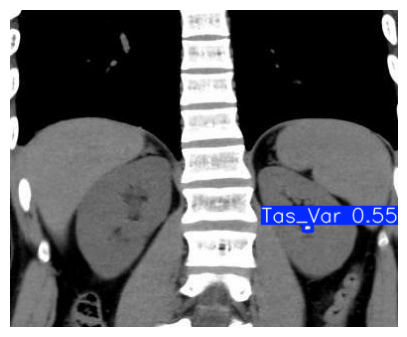

In [19]:
show_single_image(single_image, model_yolov8_trained)

In [20]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r /content/KidneyStone_yolov8s.zip /content/KidneyStone_yolov8s

  adding: content/KidneyStone_yolov8s/ (stored 0%)
  adding: content/KidneyStone_yolov8s/yolo_v8/ (stored 0%)
  adding: content/KidneyStone_yolov8s/yolo_v8/val_batch0_pred.jpg (deflated 10%)
  adding: content/KidneyStone_yolov8s/yolo_v8/train_batch2640.jpg (deflated 11%)
  adding: content/KidneyStone_yolov8s/yolo_v8/P_curve.png (deflated 17%)
  adding: content/KidneyStone_yolov8s/yolo_v8/results.png (deflated 6%)
  adding: content/KidneyStone_yolov8s/yolo_v8/val_batch1_pred.jpg (deflated 9%)
  adding: content/KidneyStone_yolov8s/yolo_v8/train_batch2.jpg (deflated 6%)
  adding: content/KidneyStone_yolov8s/yolo_v8/weights/ (stored 0%)
  adding: content/KidneyStone_yolov8s/yolo_v8/weights/last.pt (deflated 12%)
  adding: content/KidneyStone_yolov8s/yolo_v8/weights/best.pt (deflated 11%)
  adding: content/KidneyStone_yolov8s/yolo_v8/args.yaml (deflated 52%)
  adding: content/KidneyStone_yolov8s/yolo_v8/events.out.tfevents.1734072875.c1b5250d39c3.1011.0 (deflated 90%)
  adding: content/Kidn